<a href="https://colab.research.google.com/github/Jeniejean/ML/blob/main/TISCO_Stock_Price_Prediction_6610422019_Nutthida_Yotaprasert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://finance.yahoo.com/quote/TISCO.BK

In [1]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib

--2024-02-23 03:22:10--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-23 03:22:10--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-23 03:22:10--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [2]:
# Data Manipulation
import numpy as np
import pandas as pd
import yfinance as yf

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
data = yf.Ticker('tisco.bk')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
df = data.history(interval=interval,start=start,end=end)
df = df.loc[:,['Open','High','Low','Close']]
df.head()

,Open,High,Low,Close
Datetime,,,,
2023-01-03 10:00:00+07:00,99.75,99.75,99.50,99.75
2023-01-03 11:00:00+07:00,99.75,99.75,99.50,99.50
2023-01-03 12:00:00+07:00,99.50,99.75,99.25,99.50
2023-01-03 14:00:00+07:00,99.50,99.75,99.50,99.50
2023-01-03 15:00:00+07:00,99.50,99.75,99.50,99.50


In [4]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod=10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
df.head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-06 10:00:00+07:00,100.0,100.5,99.75,100.5,99.800,0.407802,68.656534,0.25,0.25
2023-01-06 11:00:00+07:00,100.5,100.5,100.00,100.5,99.850,0.748333,68.656534,0.00,0.50
2023-01-06 12:00:00+07:00,100.5,100.5,100.00,100.0,99.875,0.688734,53.177411,0.00,0.00
2023-01-06 14:00:00+07:00,100.0,100.5,100.00,100.0,99.925,0.519337,53.177411,0.00,-0.50
2023-01-06 15:00:00+07:00,100.0,100.5,100.00,100.5,99.975,0.688135,63.372421,0.00,0.00


In [5]:
x = df.iloc[:,:9]
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
x.head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-06 10:00:00+07:00,100.0,100.5,99.75,100.5,99.800,0.407802,68.656534,0.25,0.25
2023-01-06 11:00:00+07:00,100.5,100.5,100.00,100.5,99.850,0.748333,68.656534,0.00,0.50
2023-01-06 12:00:00+07:00,100.5,100.5,100.00,100.0,99.875,0.688734,53.177411,0.00,0.00
2023-01-06 14:00:00+07:00,100.0,100.5,100.00,100.0,99.925,0.519337,53.177411,0.00,-0.50
2023-01-06 15:00:00+07:00,100.0,100.5,100.00,100.5,99.975,0.688135,63.372421,0.00,0.00


In [7]:
split = int(0.7*len(df))
x_train, x_test, y_train, y_test = x[:split], x[split:], y[:split], y[split:]

model = LogisticRegression(max_iter=1000)
model = model.fit (x_train,y_train)
pd.DataFrame(zip(x.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.4002181329940615]
1,High,[1.2212651321286256]
2,Low,[1.7707293294889601]
3,Close,[-3.3587140740680534]
4,S_10,[-0.08611562244293752]
5,Corr,[-0.3798568040947998]
6,RSI,[-0.00796957243326267]
7,Open-Close,[0.18506059863548682]
8,Open-Open,[-0.20896595891798525]


In [8]:
# Specify the date for prediction
prediction_date = '2023-12-1'
probability = model.predict_proba(x_test)
print(probability)

[[0.87712224 0.12287776]
 [0.87688185 0.12311815]
 [0.89018485 0.10981515]
 [0.87600874 0.12399126]
 [0.50317505 0.49682495]
 [0.53695259 0.46304741]
 [0.87592797 0.12407203]
 [0.87044585 0.12955415]
 [0.88693924 0.11306076]
 [0.55923828 0.44076172]
 [0.51326051 0.48673949]
 [0.8494247  0.1505753 ]
 [0.85157485 0.14842515]
 [0.83948792 0.16051208]
 [0.54139465 0.45860535]
 [0.8578515  0.1421485 ]
 [0.55270062 0.44729938]
 [0.75302579 0.24697421]
 [0.77958259 0.22041741]
 [0.76576759 0.23423241]
 [0.68577276 0.31422724]
 [0.72524259 0.27475741]
 [0.71407329 0.28592671]
 [0.87001027 0.12998973]
 [0.81107728 0.18892272]
 [0.74351563 0.25648437]
 [0.74535044 0.25464956]
 [0.65128898 0.34871102]
 [0.64847658 0.35152342]
 [0.8099263  0.1900737 ]
 [0.78940592 0.21059408]
 [0.76125949 0.23874051]
 [0.64877651 0.35122349]
 [0.74801733 0.25198267]
 [0.92382167 0.07617833]
 [0.65502272 0.34497728]
 [0.79161979 0.20838021]
 [0.95472183 0.04527817]
 [0.85695385 0.14304615]
 [0.79362299 0.20637701]


In [9]:
predicted = model.predict(x_test)
predicted

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
        1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1

In [10]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[298  10]
 [107  18]]
              precision    recall  f1-score   support

          -1       0.74      0.97      0.84       308
           1       0.64      0.14      0.24       125

    accuracy                           0.73       433
   macro avg       0.69      0.56      0.54       433
weighted avg       0.71      0.73      0.66       433



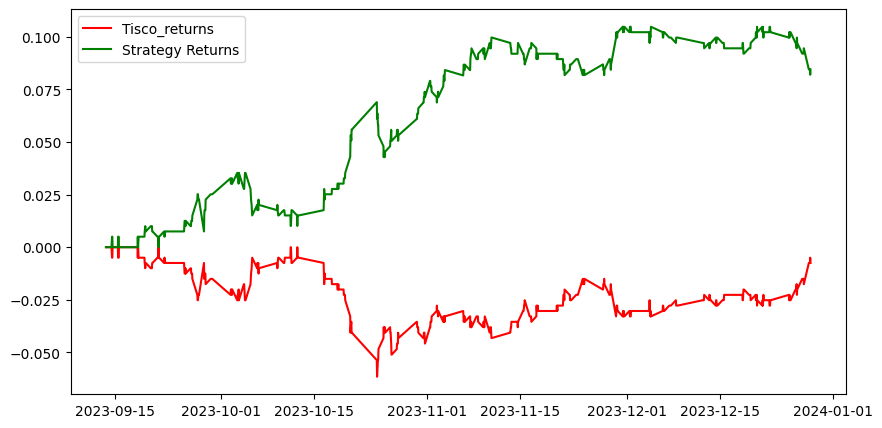

In [11]:
df['Predicted_Signal'] = model.predict(x)
df['Tisco_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Tesla_returns = np.cumsum(df[split:]['Tisco_returns'])

df['Startegy_returns'] = df['Tisco_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Tesla_returns, color='r',label = 'Tisco_returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [14]:
#เลือกข้อมูลหุ้น SCB เพิ่ม
data2 = yf.Ticker('SCB.BK')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
df2 = data2.history(interval=interval,start=start,end=end)
df2 = df2.loc[:,['Open','High','Low','Close']]
df2['SCB_Y'] = np.where(df2['Close'].shift(-1) > df2['Close'],1,-1)
df2.head()

,Open,High,Low,Close,SCB_Y
Datetime,,,,,
2023-01-03 10:00:00+07:00,107.0,107.0,106.5,107.0,-1
2023-01-03 11:00:00+07:00,107.0,107.0,106.5,107.0,-1
2023-01-03 12:00:00+07:00,106.5,107.0,106.5,107.0,-1
2023-01-03 14:00:00+07:00,107.0,107.0,106.5,107.0,1
2023-01-03 15:00:00+07:00,107.0,107.5,106.0,107.5,-1


In [15]:
#รวมข้อมูล Y ของหุ้น TISCO เข้ากับข้อมูลหุ้น SCB
merged_df = pd.merge(df.iloc[:,:9],df2['SCB_Y'],on='Datetime', how='inner')
merged_df.head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open,SCB_Y
Datetime,,,,,,,,,,
2023-01-06 10:00:00+07:00,100.0,100.5,99.75,100.5,99.800,0.407802,68.656534,0.25,0.25,-1
2023-01-06 11:00:00+07:00,100.5,100.5,100.00,100.5,99.850,0.748333,68.656534,0.00,0.50,1
2023-01-06 12:00:00+07:00,100.5,100.5,100.00,100.0,99.875,0.688734,53.177411,0.00,0.00,-1
2023-01-06 14:00:00+07:00,100.0,100.5,100.00,100.0,99.925,0.519337,53.177411,0.00,-0.50,1
2023-01-06 15:00:00+07:00,100.0,100.5,100.00,100.5,99.975,0.688135,63.372421,0.00,0.00,-1


In [16]:
X2 = merged_df.iloc[:,:10]
y2 = np.where(merged_df['Close'].shift(-1) > merged_df['Close'],1,-1)
X2.head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open,SCB_Y
Datetime,,,,,,,,,,
2023-01-06 10:00:00+07:00,100.0,100.5,99.75,100.5,99.800,0.407802,68.656534,0.25,0.25,-1
2023-01-06 11:00:00+07:00,100.5,100.5,100.00,100.5,99.850,0.748333,68.656534,0.00,0.50,1
2023-01-06 12:00:00+07:00,100.5,100.5,100.00,100.0,99.875,0.688734,53.177411,0.00,0.00,-1
2023-01-06 14:00:00+07:00,100.0,100.5,100.00,100.0,99.925,0.519337,53.177411,0.00,-0.50,1
2023-01-06 15:00:00+07:00,100.0,100.5,100.00,100.5,99.975,0.688135,63.372421,0.00,0.00,-1


In [26]:
split2 = int(0.7*len(merged_df))
X_train2, X_test2, y_train2, y_test2 = X2[:split2], X2[split2:], y2[:split2], y2[split2:]

model2 = LogisticRegression(max_iter=1000)
model2 = model2.fit (X_train2,y_train2)
pd.DataFrame(zip(X2.columns, np.transpose(model2.coef_)))

,0,1
0,Open,[0.32140346039651735]
1,High,[1.2918190402762268]
2,Low,[1.7594334920026429]
3,Close,[-3.3258713508810986]
4,S_10,[-0.09944888201160915]
5,Corr,[-0.3857024590432131]
6,RSI,[-0.009546918984997984]
7,Open-Close,[0.2511646708204768]
8,Open-Open,[-0.25928892620960065]
9,SCB_Y,[0.2802289535601974]


In [18]:
# Specify the date for prediction
prediction_date2 = '2023-12-1'
probability2 = model2.predict_proba(X_test2)
print(probability2)

[[0.82696921 0.17303079]
 [0.89848094 0.10151906]
 [0.90498531 0.09501469]
 [0.89778686 0.10221314]
 [0.41079094 0.58920906]
 [0.56723622 0.43276378]
 [0.89154711 0.10845289]
 [0.82663268 0.17336732]
 [0.9021874  0.0978126 ]
 [0.61126735 0.38873265]
 [0.55205977 0.44794023]
 [0.86866376 0.13133624]
 [0.87413164 0.12586836]
 [0.86341942 0.13658058]
 [0.44053968 0.55946032]
 [0.87875698 0.12124302]
 [0.5916669  0.4083331 ]
 [0.77903296 0.22096704]
 [0.80932957 0.19067043]
 [0.79088399 0.20911601]
 [0.71698283 0.28301717]
 [0.75957917 0.24042083]
 [0.74594369 0.25405631]
 [0.81561954 0.18438046]
 [0.83898299 0.16101701]
 [0.66028241 0.33971759]
 [0.77384759 0.22615241]
 [0.68633319 0.31366681]
 [0.68349514 0.31650486]
 [0.7415888  0.2584112 ]
 [0.81758323 0.18241677]
 [0.78411145 0.21588855]
 [0.68910087 0.31089913]
 [0.78249174 0.21750826]
 [0.88945128 0.11054872]
 [0.70547557 0.29452443]
 [0.8154187  0.1845813 ]
 [0.96219559 0.03780441]
 [0.80199199 0.19800801]
 [0.82271696 0.17728304]


In [19]:
predicted2 = model2.predict(X_test2)
predicted2

array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1

In [20]:
print(metrics.confusion_matrix(y_test2, predicted2))
print(metrics.classification_report(y_test2, predicted2))

[[293  15]
 [ 98  27]]
              precision    recall  f1-score   support

          -1       0.75      0.95      0.84       308
           1       0.64      0.22      0.32       125

    accuracy                           0.74       433
   macro avg       0.70      0.58      0.58       433
weighted avg       0.72      0.74      0.69       433



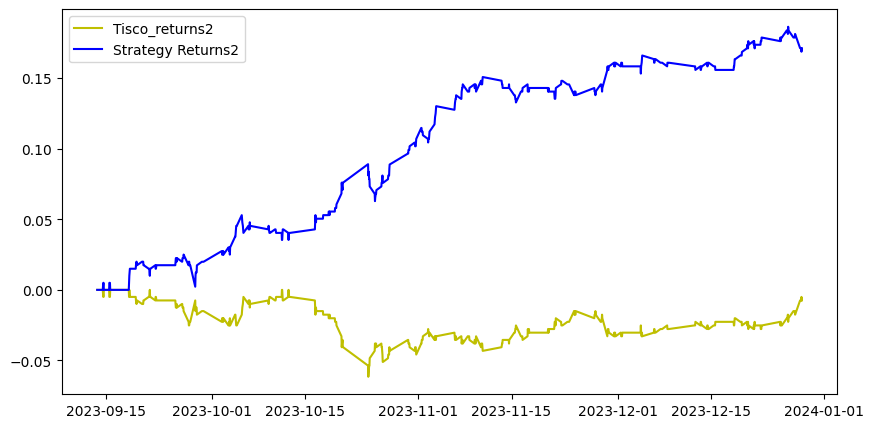

In [33]:
merged_df['Predicted_Signal'] = model2.predict(X2)
merged_df['Tisco_returns'] = np.log(merged_df['Close']/merged_df['Close'].shift(1))
Cumulative_Tisco_SCB_returns2 = np.cumsum(merged_df[split:]['Tisco_returns'])

merged_df['Startegy_returns'] = merged_df['Tisco_returns']* merged_df['Predicted_Signal'].shift(1)
Cumulative_Strategy_SCB_returns2 = np.cumsum(merged_df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Tisco_SCB_returns2, color='y',label = 'Tisco_returns2')
plt.plot(Cumulative_Strategy_SCB_returns2, color='b', label = 'Strategy Returns2')
plt.legend()
plt.show()

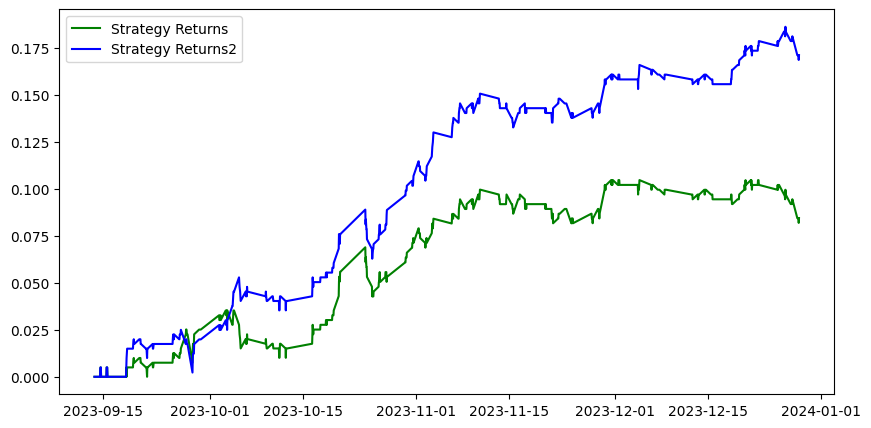

In [34]:
#เปรียบเทียบ Strategy Returns ของ model1, model2
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.plot(Cumulative_Strategy_SCB_returns2, color='b', label = 'Strategy Returns2')
plt.legend()
plt.show()